<a href="https://colab.research.google.com/github/Giovannacm/machine-learning/blob/main/LinearRegression_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

In [2]:
def mse(y_true, y_predicted): #loss/cost
  cost = np.sum((y_predicted - y_true)**2) / (2 * len(y_true))
  return cost

# Imprementação para um atributo

In [3]:
def gradient_descent(X, y, max_iterations=1000, learning_rate=1e-4, stopping_threshold=1e-6):
  w1 = 0.1
  w0 = 0.01
  m = len(X)

  previous_cost = None

  for iteration in range(max_iterations):
    y_predicted = w0 + (w1 * X)

    current_cost = mse(y, y_predicted)
    if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
      break
    previous_cost = current_cost

    weight_derivative = sum((y_predicted - y) * X) / m
    bias_derivative = sum(y_predicted - y) / m

    w1 = w1 - learning_rate * weight_derivative
    w0 = w0 - learning_rate * bias_derivative

  return w1, w0

In [5]:
X = np.array([32, 53, 61, 47, 59, 55, 52, 39, 48, 52, 45, 54, 44, 58, 56, 48, 44, 60, 45, 38])
y = np.array([31, 68, 62, 71, 87, 78, 79, 59, 75, 71, 55, 82, 62, 75, 81, 60, 82, 97, 48, 56])

Estimated Weight: 1.3930799068810311
Estimated Bias: 0.03534049078827478


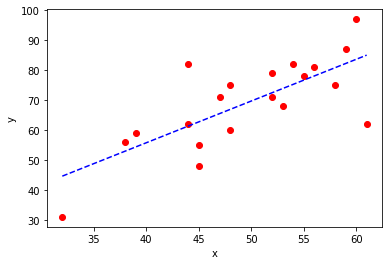

In [5]:
estimated_weight, eatimated_bias = gradient_descent(X, y, max_iterations=2000)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {eatimated_bias}")

Y_pred = estimated_weight*X + eatimated_bias

plt.scatter(X, y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue', linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Implementação para múltiplos atributos

In [3]:
def gradient_descent2(X, y, max_iterations=1000, learning_rate=1e-4, stopping_threshold=1e-6):
  n = X.ndim
  m = len(X)

  X = np.c_[np.ones((m, 1)), X]
  w = np.array([[0.1], [0.01]])

  previous_cost = None

  for iteration in range(max_iterations):
    y_predicted = np.dot(X, w).reshape(m)

    current_cost = mse(y, y_predicted)
    if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
      break
    previous_cost = current_cost

    w_new = w.reshape(n+1) - learning_rate * np.dot(X.T, (y_predicted - y)) / m
    w = w_new

  return w

Estimated Weight: [0.12707189 1.39126892]


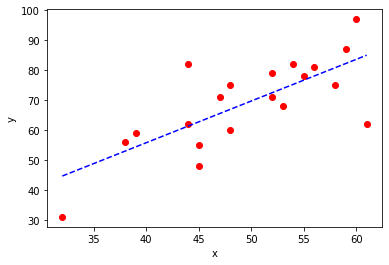

In [6]:
estimated_weights = gradient_descent2(X, y, max_iterations=2000)
print(f"Estimated Weight: {estimated_weights}")

Y_pred = estimated_weights[1]*X + estimated_weights[0]

plt.scatter(X, y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue', linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Teste com biblioteca

In [11]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.8079250570768535

In [12]:
reg.coef_

array([[ 3.63164784, -0.69363426],
       [ 0.63164784,  2.30636574]])

In [13]:
reg.intercept_

array([4.04438931, 4.04438931])

In [14]:
reg.predict(np.array([[3, 5]]))

array([[11.47116152, 17.47116152]])